In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
list(housing.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


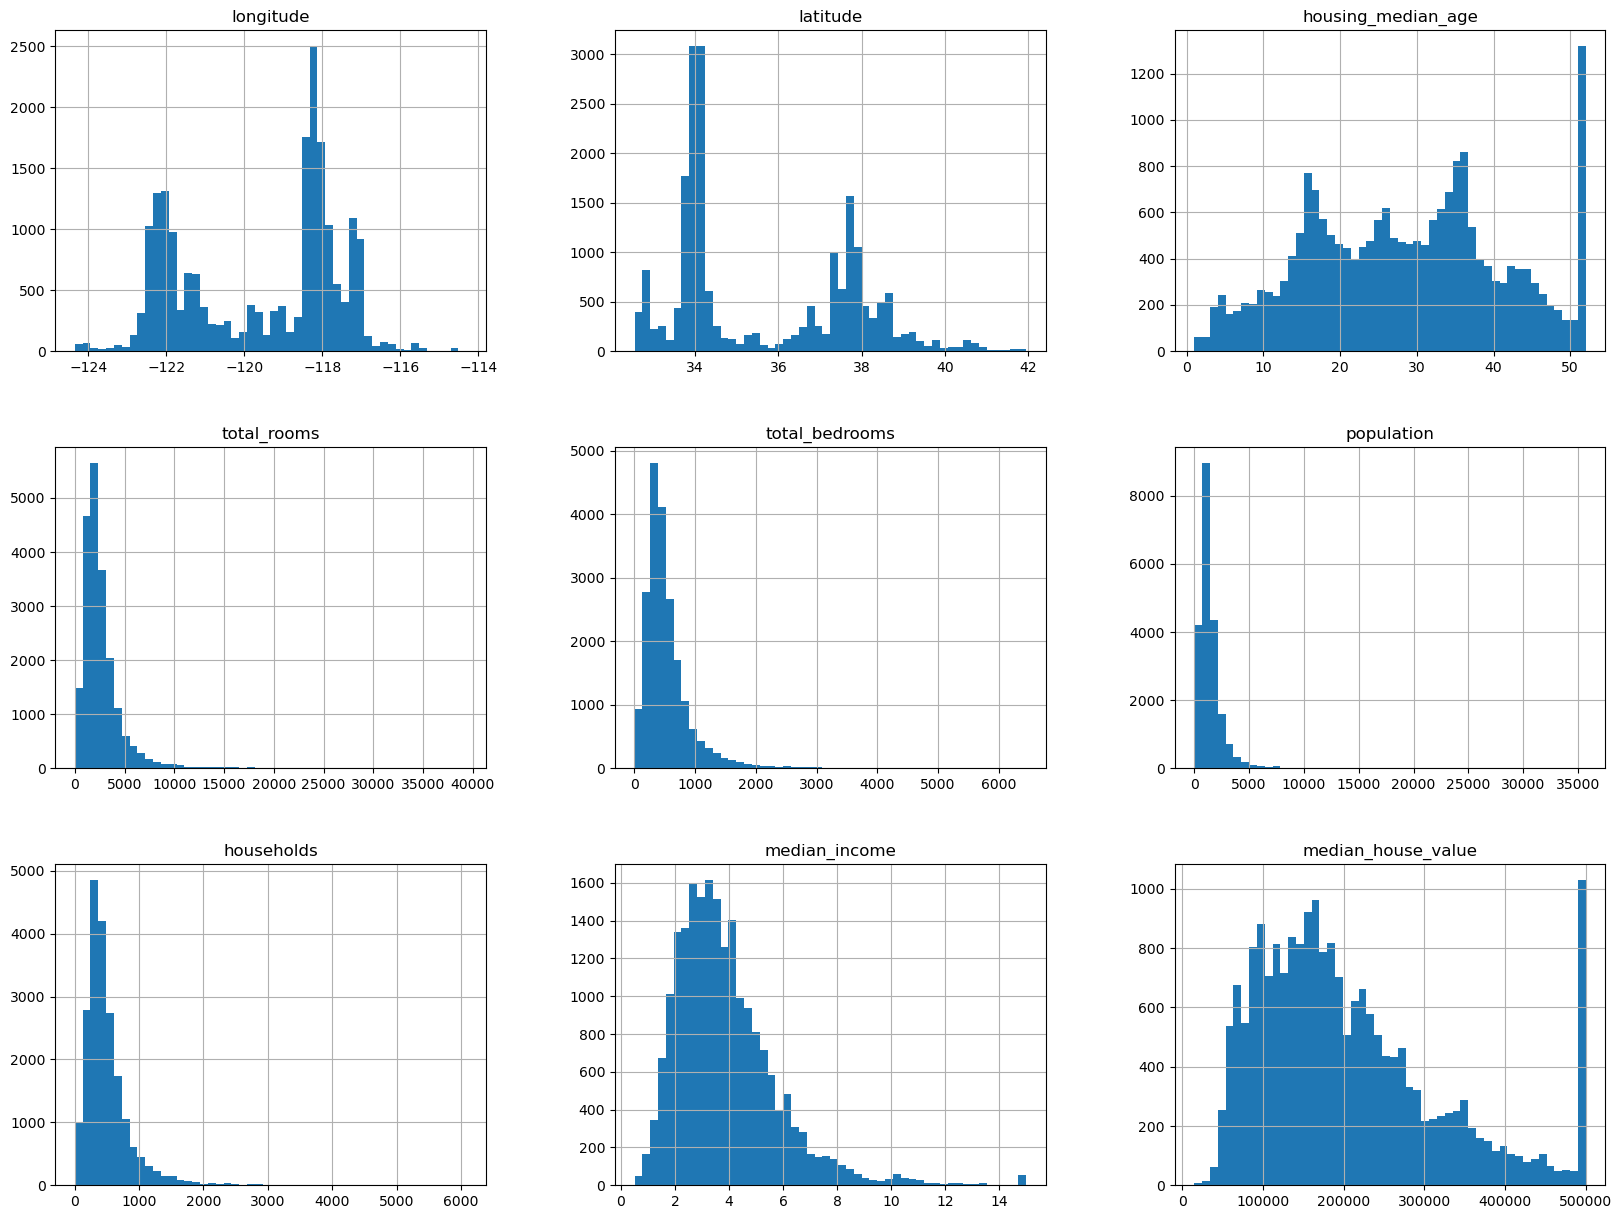

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
housing["median_income"].head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

<Axes: >

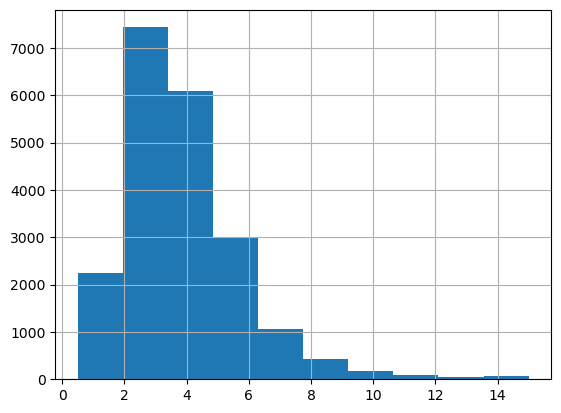

In [9]:
housing["median_income"].hist()


In [10]:
#  This function is also useful for going from a continuous variable to a categorical variable.
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.,np.inf], labels=[x for x in range(1,6)])

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

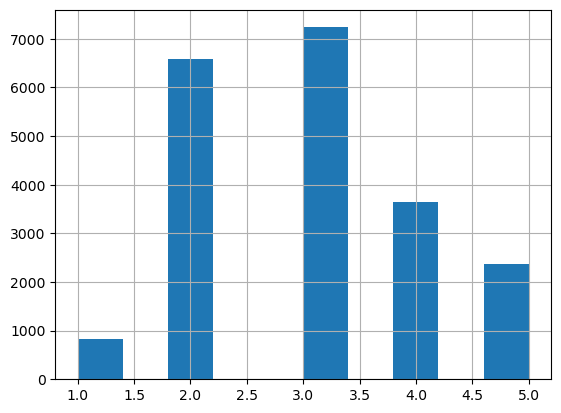

In [12]:
housing["income_cat"].hist()


In [13]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [14]:
#split purely random sampling methods sampling which can cause bia, not representative of the whole data
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### stratified sampling based on the income category.

In [15]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
len(strat_train_set),len(strat_test_set)

(16512, 4128)

<Axes: >

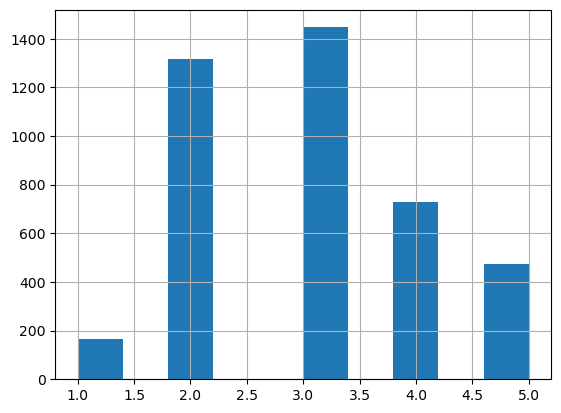

In [17]:
strat_test_set["income_cat"].hist()

<Axes: >

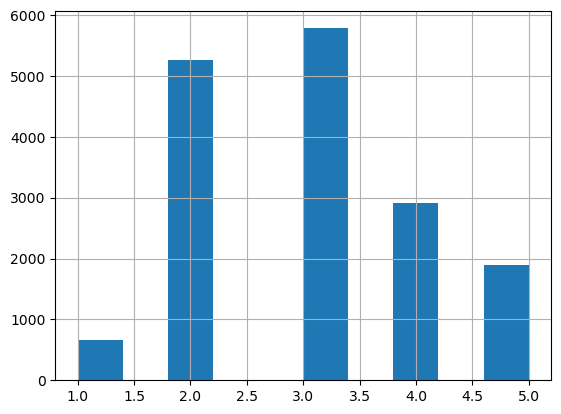

In [18]:
strat_train_set["income_cat"].hist()

In [19]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3


In [20]:
for _data in (strat_test_set, strat_train_set):
    _data.drop("income_cat", axis=1, inplace=True)

In [21]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY


In [22]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


## Discover and Visualize the Data to Gain Insights

In [23]:
housing = strat_train_set.copy()

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

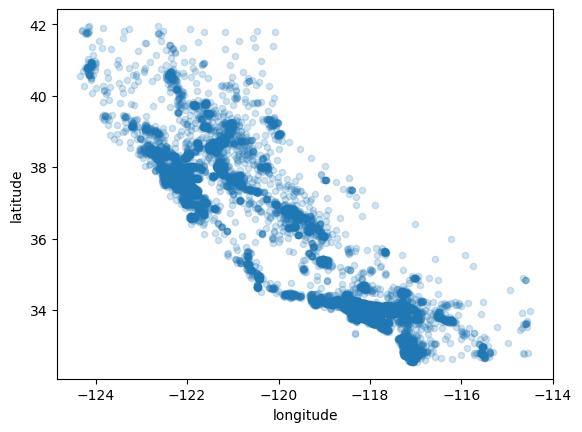

In [25]:
housing.plot(kind="scatter", x="longitude",y="latitude",alpha=0.2)

### Scatter Plot Summary

This code snippet generates a scatter plot using the `housing` DataFrame to visualize the geographical distribution, population density, and median house values. Below is a breakdown of each component:

- **Scatter Plot**: The plot is a scatter plot (`kind="scatter"`) with:
  - **X-axis**: `longitude` (geographical coordinate)
  - **Y-axis**: `latitude` (geographical coordinate)

- **Transparency**: 
  - **`alpha=0.4`**: Points are semi-transparent, helping to visualize density. Darker areas indicate more overlapping points.

- **Point Size**:
  - **`s=housing["population"]/100`**: Point size is determined by the population, scaled down by 100. Larger circles represent higher population densities.

- **Point Label**:
  - **`label="population"`**: The size of the points corresponds to the population.

- **Figure Size**:
  - **`figsize=(10,7)`**: The plot size is 10 inches wide by 7 inches tall.

- **Color Mapping**:
  - **`c="median_house_value"`**: Point color is determined by the median house value. 
  - **`cmap=plt.get_cmap("jet")`**: The "jet" colormap is used, with blue representing lower values and red representing higher values.

- **Color Bar**:
  - **`colorbar=True`**: A color bar is added to the plot to indicate the mapping of colors to house values.

### Insights
- **Geographical Distribution**: Points are plotted based on geographical coordinates, showing their location on a map-like grid.
- **Population Density**: Larger circles represent areas with higher populations.
- **House Value Distribution**: Colors represent house values, with blue for lower and red for higher values.
- **Combined Analysis**: This plot allows for the observation of relationships between location, population density, and housing prices.


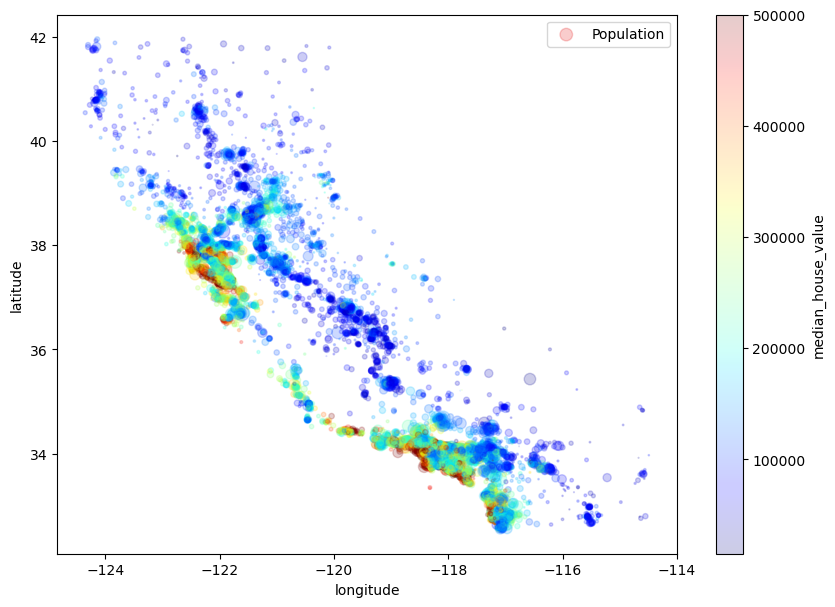

In [26]:
housing.plot(kind="scatter", x="longitude",y="latitude",alpha=0.2, s=housing["population"]/100, label="Population"
            ,c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7))
plt.legend()

In [27]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

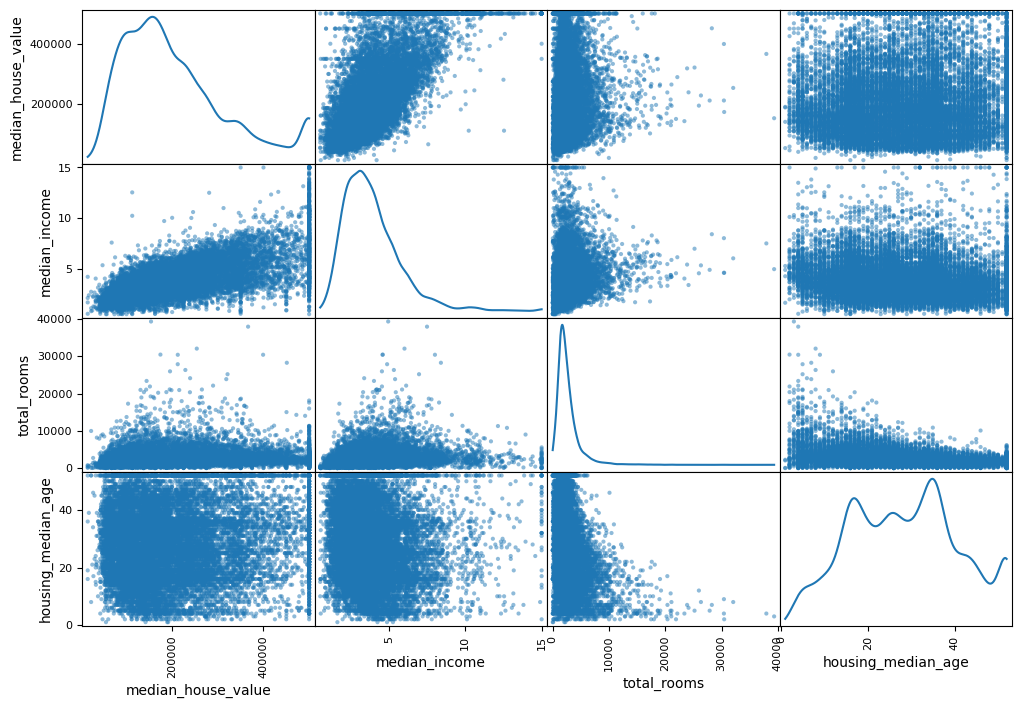

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), diagonal="kde")
plt.show()

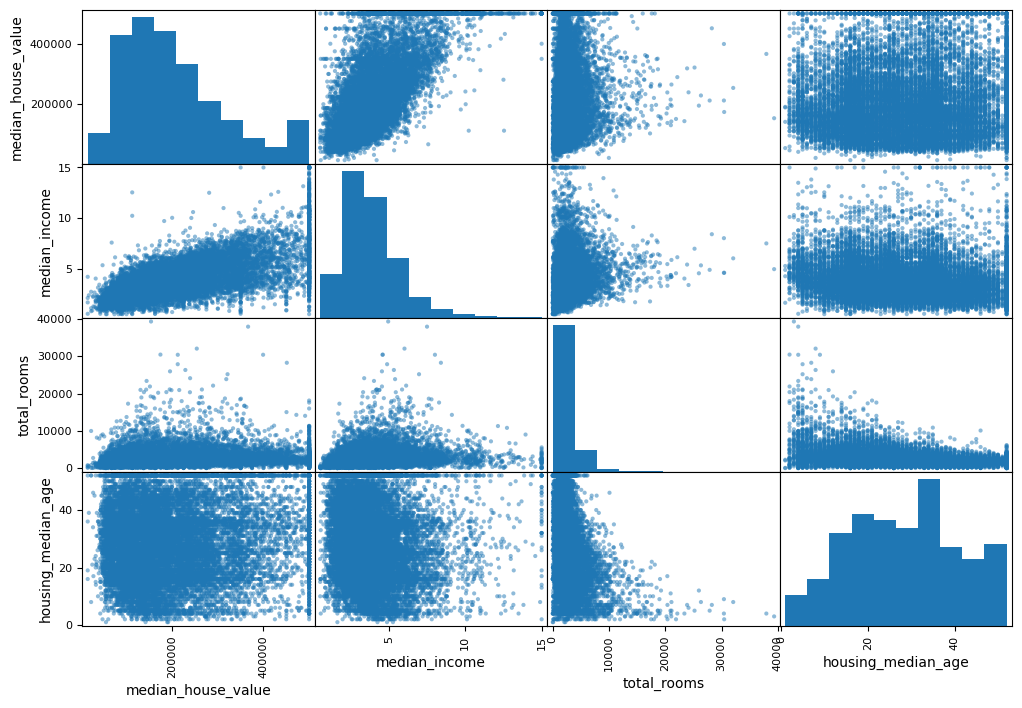

In [30]:
scatter_matrix(housing[attributes], figsize=(12, 8), diagonal="hist")
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

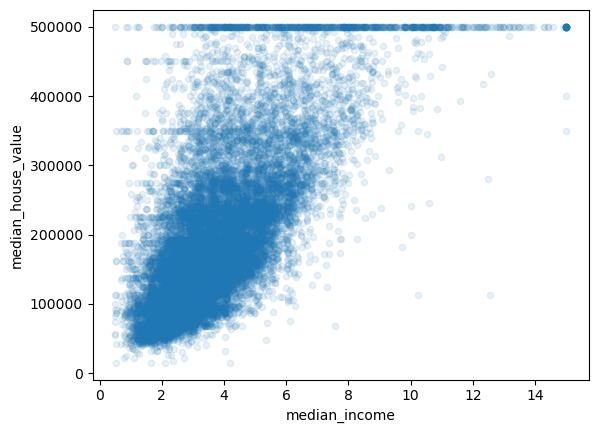

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
corr_matrix = housing.corr(numeric_only = True)

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

## Prepare Data for Machine Learning Algorithm

### Data Cleaning

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1)

In [36]:
housing_labels = strat_train_set["median_house_value"].copy()

In [37]:
# use median of columns to fill empty values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
# ince the median can only be computed on numerical attribute
housing_num = housing.drop("ocean_proximity", axis=1)

In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
X = imputer.transform(housing_num)


In [41]:
X.shape

(16512, 8)

In [42]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [43]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
16507,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
16508,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
16509,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
16510,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [45]:
housing_tr.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

### Handling Text / Categorical Data

In [46]:
housing_cat = housing["ocean_proximity"]
housing_cat.head()

13096      NEAR BAY
14973     <1H OCEAN
3785         INLAND
14689        INLAND
20507    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [47]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [48]:
cat_to_array = np.array(housing_cat)
reshaped_cat_to_array = cat_to_array.reshape(-1,1,)

In [49]:
housing_cat_encoded = ordinal_encoder.fit_transform(reshaped_cat_to_array)

In [50]:
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [51]:
xy = pd.DataFrame(housing_cat_encoded)

In [52]:
xy[:10]

,0
0,3.0
1,0.0
2,1.0
3,1.0
4,4.0
5,1.0
6,0.0
7,3.0
8,0.0
9,0.0


In [53]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [54]:
housing_cat[:10]

13096      NEAR BAY
14973     <1H OCEAN
3785         INLAND
14689        INLAND
20507    NEAR OCEAN
1286         INLAND
18078     <1H OCEAN
4396       NEAR BAY
18031     <1H OCEAN
6753      <1H OCEAN
Name: ocean_proximity, dtype: object

In [55]:
housing["total_rooms"].min(),housing["total_rooms"].max()

(2.0, 39320.0)

In [56]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [57]:
from sklearn.preprocessing import OneHotEncoder
cat_one_encoder = OneHotEncoder()

In [58]:
housing_cat_1hot = cat_one_encoder.fit_transform(np.array(housing_cat).reshape(-
                                                                               1,1))

In [59]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [60]:
housing_cat.head(10)

13096      NEAR BAY
14973     <1H OCEAN
3785         INLAND
14689        INLAND
20507    NEAR OCEAN
1286         INLAND
18078     <1H OCEAN
4396       NEAR BAY
18031     <1H OCEAN
6753      <1H OCEAN
Name: ocean_proximity, dtype: object

### Custom Transformers


In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

room_col_index,household_col_index,population_col_index,bedroom_col_index =3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    """
    This class inherits from BaseEstimator and TransformerMixin,
    allowing it to behave like a scikit-learn transformer with fit and transform methods.
    
    bedrooms_per_room: The ratio of the number of bedrooms to the number of rooms. This feature is only added if add_bedrooms_per_room is set to True.
    np.c_[]: This concatenates the original data X with the newly created features (rooms_per_household, population_per_household, and optionally bedrooms_per_room) 
    horizontally, adding new columns to the dataset
    """
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,room_col_index] / X[:, household_col_index]
        population_per_household = X[:,population_col_index] / X[:, household_col_index]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_col_index] / X[:, room_col_index]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [62]:
test_set[0:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND,2
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN,4
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN,5


In [63]:
X =np.array(test_set)

In [64]:
X[:, 3] / X[:,5]

array([1.7904238618524333, 2.0083194675540765, 2.628936170212766, ...,
       2.3599334995843724, 2.6564195298372515, 1.865091463414634],
      dtype=object)

### Transformation Pipelines

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipline = Pipeline(
[
#     all the trnasforms we have used
    
#     To fill empty numerical data with their median
    ("imputer", SimpleImputer(strategy="median")),
#     create new attribute by combining the attr
    ("attribs_adder", CombinedAttributesAdder()),
    
#     feature scaling
    ("std_scaler", StandardScaler()),
]
)


In [66]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [67]:
housing_num_transform_with_pipeline = num_pipline.fit_transform(housing_num)

In [68]:
type(housing_num_transform_with_pipeline)

numpy.ndarray

In [69]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


full_pipeline = ColumnTransformer([
    ("num",num_pipline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])


housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [71]:
test_set.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        44
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
income_cat             0
dtype: int64

In [72]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

# Select and Train a model

### Training and Evaluating on the training set

In [73]:
from sklearn.linear_model import LinearRegression


lin_reg_model = LinearRegression()
lin_reg_model.fit(housing_prepared,housing_labels)

LinearRegression()

2. What Does the RMSE Value of 68,007 Indicate?

    The RMSE value of 68,007 means that, on average, the model's predictions are off by about \$68,007 from the actual median house values in the training dataset.

    Context of the Housing Data: According to the problem statement, most districts' median house values range between 120,000 dollars and 265,000 dollars. This means that the typical prediction error of $68,007 is quite significant compared to the actual house prices.

In [74]:
some_data_from_the_train_data = housing.iloc[:5]
some_labels_from_thr_train_data = housing_labels.iloc[:5]

some_data_transformed = full_pipeline.transform(some_data_from_the_train_data)

lin_reg_model.score(some_data_transformed,some_labels_from_thr_train_data)

0.5866899547330562

### measure the regression model’s RMSE 

In [75]:
from sklearn.metrics import mean_squared_error


housing_predictions = lin_reg_model.predict(housing_prepared)
# housing price to be predicted || housing price predicted by the model
lin_mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(lin_mse)

In [76]:
rmse

68007.00184956864

### Using DecisionTreeRegression

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

### Using RMSE on Decision Tree

In [78]:
from sklearn.metrics import mean_squared_error

housing_prediction_on_X = tree_reg_model.predict(housing_prepared)
tree_reg_mse = mean_squared_error(housing_labels, housing_prediction_on_X)
tree_reg_mse

0.0

In [79]:
tree_reg_model.score(housing_prepared, housing_labels)

1.0

## Better Evaluation Using Cross-Evaluation

- Why Negative?:

    Scikit-Learn's cross_val_score function by default expects higher scores to be better (e.g., accuracy, R^2). However, with metrics like MSE, lower values are better. To maintain consistency with this expectation, Scikit-Learn returns the negative of the MSE, so that maximizing the score corresponds to minimizing the error.

In [80]:
# using sklearn cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [81]:
tree_reg_rmse_score = np.sqrt(-scores)

In [93]:
def display_scores(scores):
#   The score should be thr rmse
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [83]:
display_scores(tree_reg_rmse_score)

Scores: [69398.60095629 69413.95512359 68088.27523432 67920.32359162
 72535.81028951 70334.29850285 71615.47806622 67734.55189975
 75485.45942938 69179.91400632]
Mean: 70170.66670998439
Standard deviation: 2311.720650737535


In [84]:
from sklearn.model_selection import cross_val_score

score_for_lin = cross_val_score(lin_reg_model,housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

In [85]:
display_scores(np.sqrt(-score_for_lin))

Scores: [69657.25203681 67688.08436895 66832.57001951 69529.13148008
 67216.10016723 68934.19475674 67050.9303794  69628.5927004
 67282.64372134 68149.0515547 ]
Mean: 68196.85511851616
Standard deviation: 1083.2578020332023


### Using RandomForestRegressor

Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions.

In [86]:
from sklearn.ensemble import RandomForestRegressor

ensembel_rand_model = RandomForestRegressor()
ensembel_rand_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [87]:
from sklearn.model_selection import cross_val_score
ensembel_rand_score = cross_val_score(ensembel_rand_model, housing_prepared, housing_labels, 
                                     scoring="neg_mean_squared_error", cv=10)

In [88]:
ensembel_rand_model.score(housing_prepared, housing_labels)

0.9739468117129533

In [98]:
from sklearn.metrics import mean_squared_error

housing_prediction_on_X = ensembel_rand_model.predict(housing_prepared)
ensembel_rand_mse = mean_squared_error(housing_labels, housing_prediction_on_X)
np.sqrt(ensembel_rand_mse)

18612.276854340995

In [90]:
type(housing_labels)

pandas.core.series.Series

In [99]:
ensembel_rand_score

array([-2.47343184e+09, -2.50481695e+09, -2.34184638e+09, -2.50461284e+09,
       -2.42402545e+09, -2.54789450e+09, -2.54062457e+09, -2.64705468e+09,
       -2.62466226e+09, -2.51827212e+09])

In [100]:
ensemble_rand_rmse= np.sqrt(-ensembel_rand_score)
display_scores(ensemble_rand_rmse)

Scores: [49733.60870689 50048.14634814 48392.6273101  50046.10709507
 49234.39297379 50476.67278107 50404.60862923 51449.53526434
 51231.45771662 50182.38849854]
Mean: 50119.954532379656
Standard deviation: 845.1715611857279


In [ ]:
ensembel_rand_model.score(tes)

In [101]:
hou

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND,2
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN,4
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN,5
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN,3
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND,2
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY,2
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND,3
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN,5


## Fine-Tuning Model

#### ways to fine-tune model
- Grid Search

In [107]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid =[
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
    {"bootstrap":[False], "n_estimators":[3,10], "max_features":[2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid,
                           scoring="neg_mean_squared_error",return_train_score=True,cv=5)

In [110]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
# check for best params
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [113]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63309.79867140959 {'max_features': 2, 'n_estimators': 3}
55597.3051522391 {'max_features': 2, 'n_estimators': 10}
52740.58441838864 {'max_features': 2, 'n_estimators': 30}
60029.60146943837 {'max_features': 4, 'n_estimators': 3}
53321.208524090405 {'max_features': 4, 'n_estimators': 10}
50280.00326960428 {'max_features': 4, 'n_estimators': 30}
58713.790222002 {'max_features': 6, 'n_estimators': 3}
52545.92960700407 {'max_features': 6, 'n_estimators': 10}
49749.18195064072 {'max_features': 6, 'n_estimators': 30}
58499.11579449582 {'max_features': 8, 'n_estimators': 3}
51984.74876839205 {'max_features': 8, 'n_estimators': 10}
50037.66233312785 {'max_features': 8, 'n_estimators': 30}
61607.42549121284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54721.02311516528 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60413.7162758536 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52327.90791598346 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
5

*    You will often gain good insights on the problem by inspecting the best models. For
        example, the RandomForestRegressor can indicate the relative importance of each
        attribute for making accurate predictions

In [115]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.45842636e-02, 7.75261013e-02, 4.30168005e-02, 1.85000658e-02,
       1.56283204e-02, 1.78673255e-02, 1.67266667e-02, 3.39611250e-01,
       6.03118754e-02, 9.90824524e-02, 6.24919441e-02, 1.42959767e-02,
       1.40940078e-01, 1.32610918e-04, 3.27351902e-03, 6.01074916e-03])

In [130]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
list(cat_encoder.categories_[0])
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3396112499224472, 'median_income'),
 (0.14094007825572713, 'INLAND'),
 (0.09908245240769734, 'pop_per_hhold'),
 (0.0845842636396279, 'longitude'),
 (0.07752610134663371, 'latitude'),
 (0.06249194408246347, 'bedrooms_per_room'),
 (0.060311875442158124, 'rooms_per_hhold'),
 (0.043016800534647674, 'housing_median_age'),
 (0.018500065831758054, 'total_rooms'),
 (0.01786732552934579, 'population'),
 (0.01672666673636825, 'households'),
 (0.01562832044461133, 'total_bedrooms'),
 (0.01429597672699617, '<1H OCEAN'),
 (0.006010749158345402, 'NEAR OCEAN'),
 (0.003273519023243284, 'NEAR BAY'),
 (0.00013261091792928507, 'ISLAND')]

## Evaluating System on Test Data

`call transform(), not
fit_transform(), you do not want to fit the test set!`

In [131]:
final_model = grid_search.best_estimator_


In [132]:
type(final_model)

sklearn.ensemble._forest.RandomForestRegressor

In [134]:
set(strat_test_set) == set(test_set)

False

In [136]:
test_set.shape, strat_test_set.shape
# strat_test is based on stratified smapling based on ""income_cat"

((4128, 11), (4128, 10))

In [137]:
X_test_data = strat_test_set.drop("median_house_value", axis=1)
y_test_data = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test_data)

In [139]:
# predict values
final_predictions = final_model.predict(X_test_prepared)

In [140]:
final_mse = mean_squared_error(y_test_data, final_predictions)
final_rmse = np.sqrt(final_mse)

In [141]:
final_rmse

49831.061846181205

In [142]:
final_model.score(X_test_prepared, y_test_data)

0.8144971050276346